1) id: unique identifier
<br>
2) gender: "Male", "Female" or "Other"
<br>
3) age: age of the patient
<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
<br>
6) ever_married: "No" or "Yes"
<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
<br>
8) Residence_type: "Rural" or "Urban"
<br>
9) avg_glucose_level: average glucose level in blood
<br>
10) bmi: body mass index
<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
<br>
12) stroke: 1 if the patient had a stroke or 0 if not
<br>
*<b>Note: "Unknown" in smoking_status means that the information is unavailable for this patient</b>

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("darkgrid")
import dtale
import matplotlib.pyplot as plt
%matplotlib inline
from lazypredict.Supervised import LazyClassifier
from imblearn.over_sampling import SMOTE


/home/vibhav/anaconda3/envs/healthcare/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [2]:
dataset=pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.drop("id",inplace=True,axis=1)
dataset.head()
dataset.shape

(5110, 11)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


<h3>As we can see only bmi has null values</h3>

## Understanding classes and their counts in categorical features

In [4]:
dataset["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [5]:
dataset["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [6]:
dataset["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [7]:
dataset["stroke"].value_counts() #This will create imbalance later

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
dataset["smoking_status"].value_counts() #unkown 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [9]:
dataset["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [10]:
dataset["age"].sort_values()

3295    0.08
1614    0.08
3618    0.16
4021    0.16
3968    0.16
        ... 
4590   82.00
4094   82.00
2341   82.00
4716   82.00
187    82.00
Name: age, Length: 5110, dtype: float64

<h3>As we can see there are children below 2 which have floating values</h3>

<h2>Lets check for some outliers </h2>

In [11]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!="O"]

In [12]:
##lets see the numerical features in the data set
numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [13]:
# for feature in numerical_features:
#     plt.plot()
#     plt.title(feature)
#     sns.boxplot(data=dataset[feature]).set_title(
#   feature, fontdict= { 'fontsize': 20, 'horizontalalignment': 'center'})
#     plt.show()

<!-- <h3>As we can see there are outliers in avg_glucose_lvl,bmi and there is also a problem in age that it has some floting values below 2</h3> -->

In [14]:
##There are two types of numerical features
##1.Discreate 2.Continous

discreate_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("There are {} discreate features".format(len(discreate_features)))
print(discreate_features)

There are 3 discreate features
['hypertension', 'heart_disease', 'stroke']


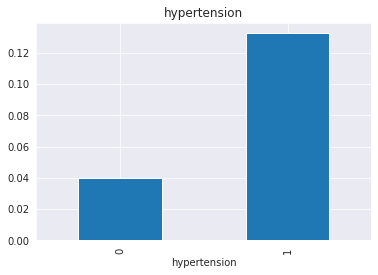

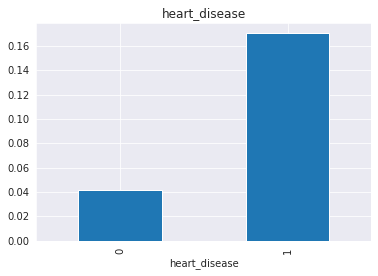

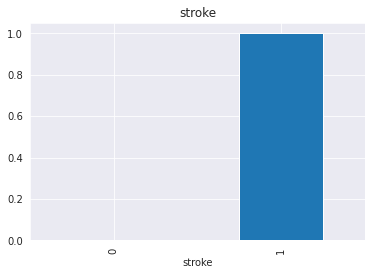

In [15]:
##Lets check some dependency of this variables with stroke
for feature in discreate_features:
    data=dataset.copy()
    plt.title(feature)
    data.groupby(feature)["stroke"].mean().plot.bar()
    plt.show()

As we can see that if person has heart_disease,hypertension there are more chance of storke

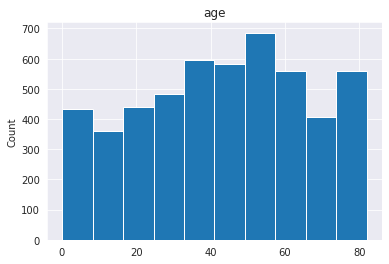

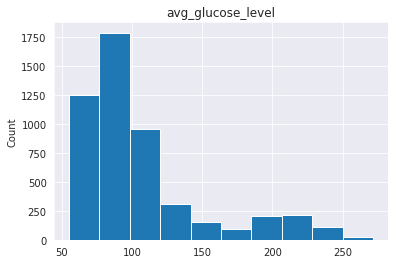

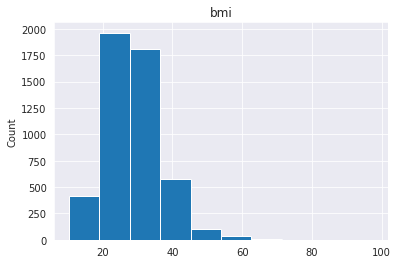

In [16]:
##Now lets see the continous variable plots
for feature in numerical_features:
    if feature not in discreate_features:
        plt.plot()
        plt.title(feature)
        plt.ylabel("Count")
        plt.hist(x=dataset[feature])
        plt.show()
        

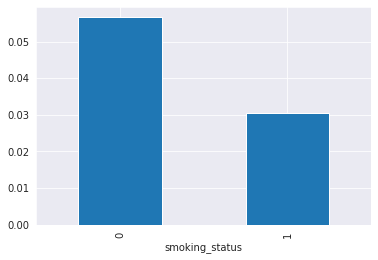

In [17]:
##In smoking status there is value unkown lets see if it has effect on stroke
data=dataset.copy()
data["smoking_status"]=np.where(data["smoking_status"]=="Unknown",1,0)
data.groupby("smoking_status")["stroke"].mean().plot.bar()
plt.show()

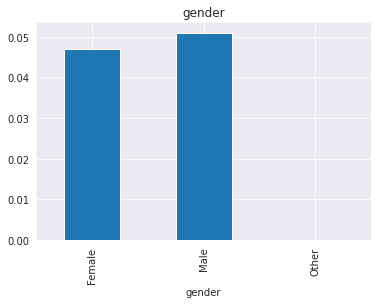

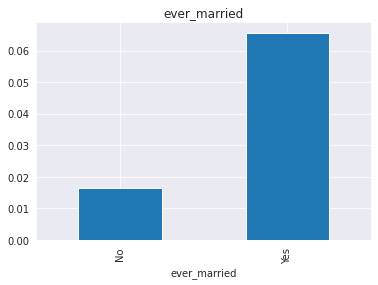

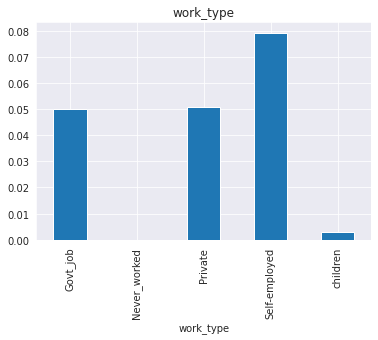

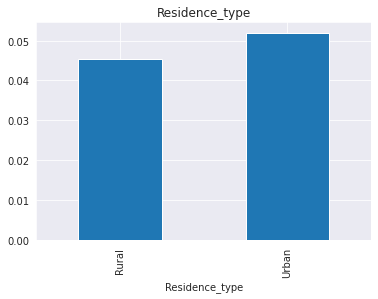

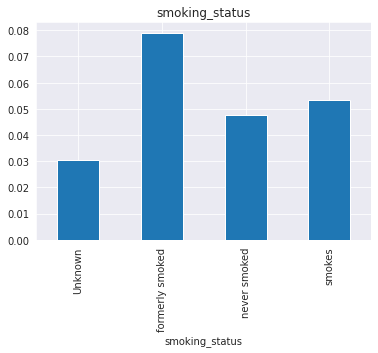

In [21]:
for feature in dataset.columns:
    if feature in numerical_features:
        continue
    data=dataset.copy()
    plt.title(feature)
    data.groupby(feature)["stroke"].mean().plot.bar()
    plt.show()

In [19]:
# ##Using lazy predict to check the score
# X=dataset.drop("stroke",axis=1)
# y=dataset["stroke"]
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)

# print(models)

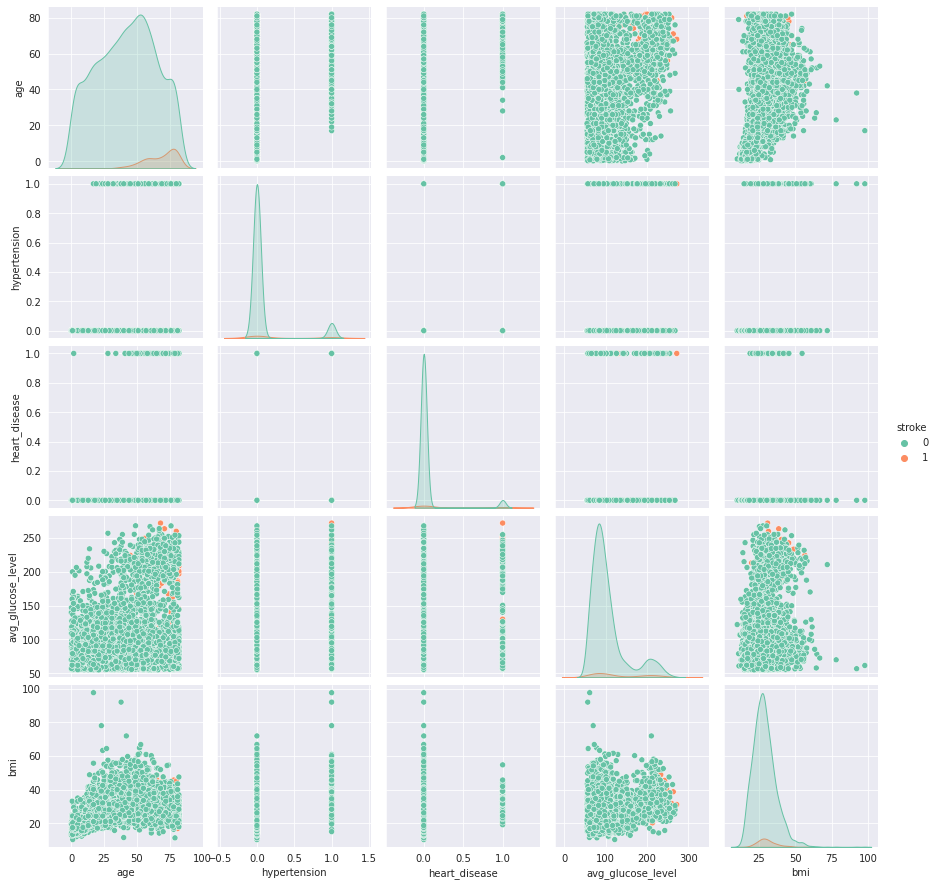

In [20]:
##Lets check the pair plot
sns.pairplot(dataset,hue="stroke",palette="Set2")

### As we can see that we this is and imbalanced dataset so we will perform upsampling


## We perform some sort of encoding technique

In [26]:
data=dataset.copy()
data=pd.get_dummies(data, drop_first=False)

In [27]:
data.shape

(5110, 22)

In [29]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.00,0,1,228.69,36.60,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.00,0,0,202.21,nan,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.00,0,1,105.92,32.50,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.00,0,0,171.23,34.40,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.00,1,0,174.12,24.00,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.00,1,0,83.75,nan,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.00,0,0,125.20,40.00,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.00,0,0,82.99,30.60,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.00,0,0,166.29,25.60,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [30]:
data.to_csv("training_data.csv",)